# Data Science - Micro Projects
## Model Development (Predicting the average price of a car)
### Charles Mawusi - University of Bordeaux 

In this project develops several models that will predict the price of the car using the variables or features.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


### Linear Regression and Multiple Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

In [12]:
# Create the linear regression object 

lm = LinearRegression ()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
# How could Highway-mpg help us predict car price? SLR I reporeted coefficents, intercept and R-squared
Y = df["price"]
X = df[["highway-mpg"]]
model_ols = lm.fit(X, Y)

In [26]:
print("coefficients is {} and intercept is {}  and the R-squared is {} ".format(model_ols.coef_, model_ols.intercept_ , lm.score(X,Y))  )

coefficients is [-821.73337832] and intercept is 38423.305858157386  and the R-squared is 0.4965911884339175 


In [28]:
# How could Highway-mpg help us predict car price? SLR I reporeted coefficents, intercept and R-squared
Y= df["price"]
X= df[["engine-size"]]
model = lm.fit(X, Y)

In [29]:
print("coefficients is {} and intercept is {}  and the R-squared is {} ".format(model.coef_, model.intercept_ , lm.score(X,Y))  )

coefficients is [166.86001569] and intercept is -7963.338906281049  and the R-squared is 0.7609686443622008 


In [34]:
# Using more features or regressors 
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
model1 = lm.fit(Z, df['price'])

In [35]:
print("coefficients is {} and intercept is {}  and the R-squared is {} ".format(model1.coef_, model1.intercept_ , lm.score(Z,df['price']))  )

coefficients is [53.49574423  4.70770099 81.53026382 36.05748882] and intercept is -15806.624626329198  and the R-squared is 0.8093562806577457 


###  Model Evaluation using Visualization

In [37]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0, 48273.95934024122)

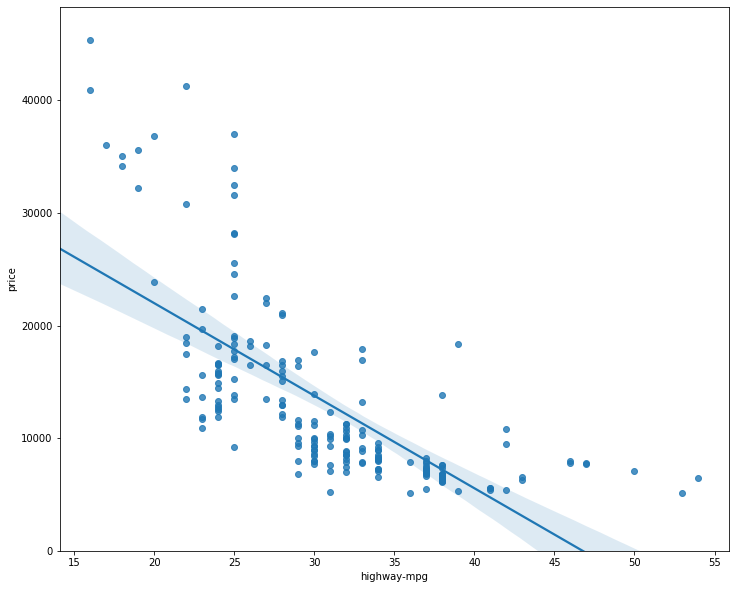

In [38]:
# Regression Plot,  Let's visualize Horsepower as potential predictor variable of price:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47422.919330307624)

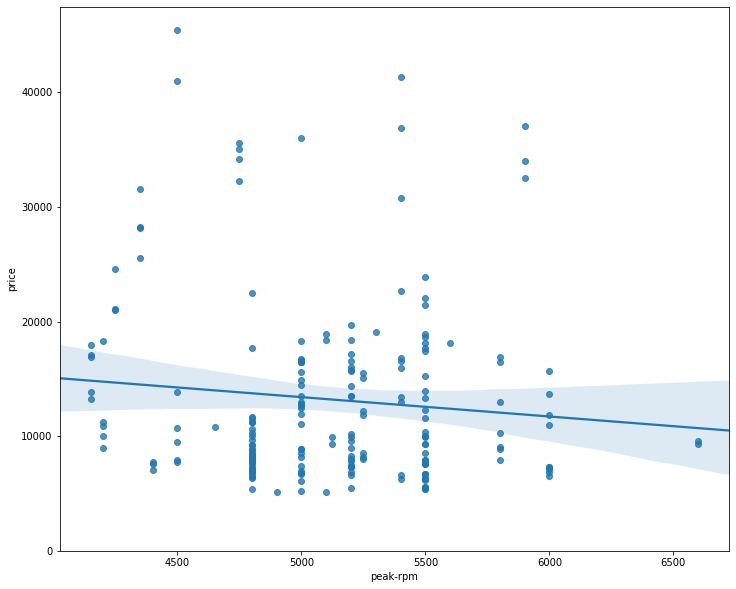

In [39]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [40]:
# Correlation between hihway mpg and peak-rpm
matrix = df[["highway-mpg",  "peak-rpm"]].corr()
matrix

,highway-mpg,peak-rpm
highway-mpg,1.000000,-0.058598
peak-rpm,-0.058598,1.000000


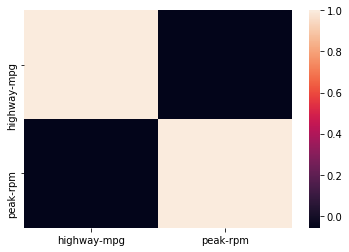

In [41]:
sns.heatmap(matrix , xticklabels=matrix.columns, yticklabels=matrix.columns)

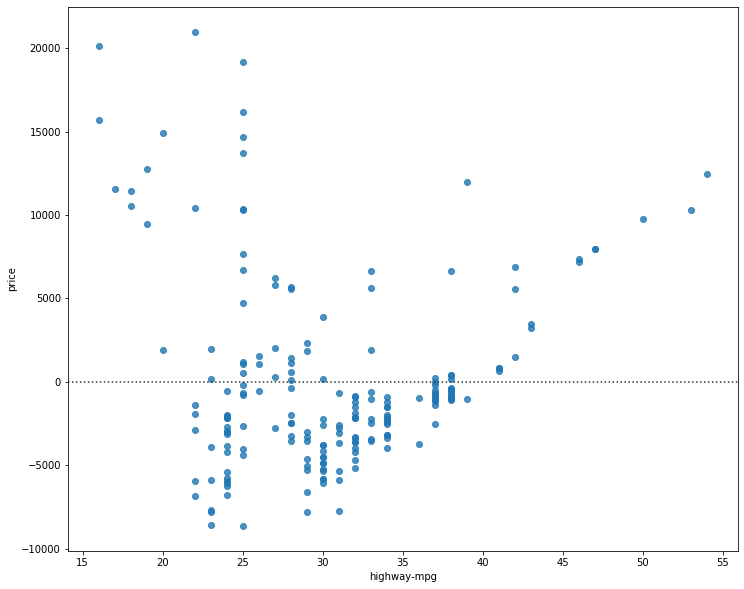

In [43]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()
# Here the residual plot seem to be unevely distributed (more like a quadratic shape we may have to consider non linear models)

#### lets predict the model above 

In [51]:
Y_hat = model1.predict(Z)
Y_hat[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

### Density Plots actual Vs Predicted 

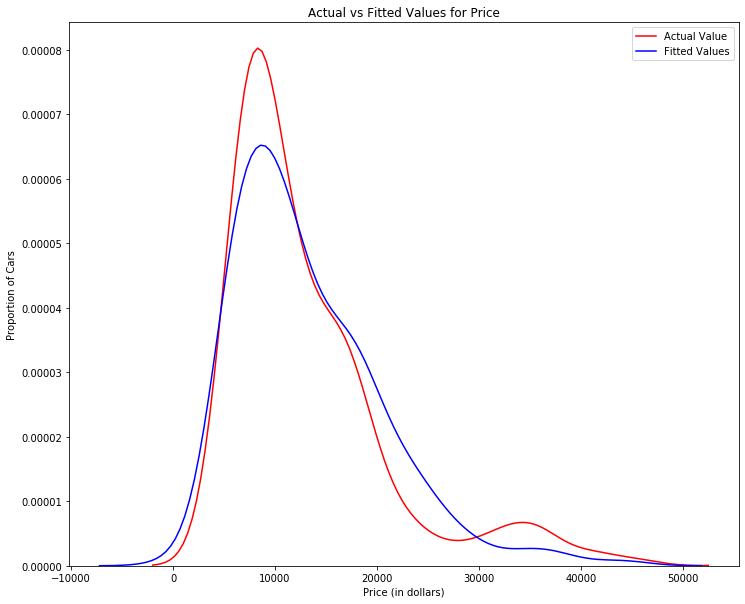

In [52]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()